#  Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Data

In [10]:
from sklearn.datasets import load_digits
df = load_digits()
df.target

array([0, 1, 2, ..., 8, 9, 8])

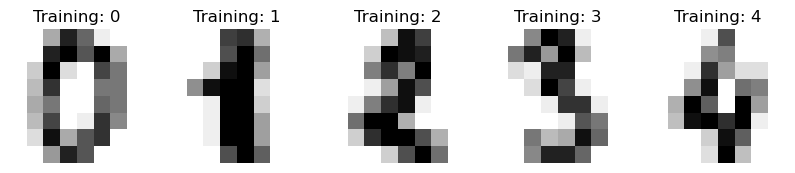

In [17]:
_, axes = plt.subplots (nrows=1, ncols=5, figsize=(10, 3))
for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

# Data Preprocessing 

In [19]:
df.images.shape

(1797, 8, 8)

In [20]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [21]:
df.images[0].shape

(8, 8)

In [23]:
n_samples = len(df.images)
data = df.images.reshape((n_samples,-1))

In [24]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [25]:
data[0].shape

(64,)

In [26]:
data.shape

(1797, 64)

# scaling Image data

In [28]:
data.min()

0.0

In [29]:
data.max()

16.0

In [30]:
data = data/16

In [31]:
data.min()

0.0

In [32]:
data.max()

1.0

In [33]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

# train test split

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train,x_test,y_train,y_test = train_test_split(data,df.target,test_size = 0.25)

In [55]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((1347, 64), (450, 64), (1347,), (450,))

# random forest model

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rf = RandomForestClassifier()

In [58]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [59]:
# predict test data

In [60]:
y_pred = rf.predict(x_test)

In [61]:
y_pred

array([7, 1, 8, 2, 0, 9, 7, 8, 1, 2, 5, 4, 5, 0, 5, 4, 3, 2, 3, 5, 5, 7,
       0, 5, 1, 8, 8, 0, 0, 6, 6, 1, 0, 9, 9, 7, 2, 3, 8, 7, 0, 8, 4, 0,
       5, 0, 7, 4, 0, 7, 7, 7, 7, 9, 6, 9, 8, 4, 1, 7, 9, 5, 0, 8, 7, 2,
       4, 8, 2, 9, 8, 9, 6, 4, 4, 6, 8, 7, 2, 5, 1, 2, 0, 1, 3, 9, 4, 9,
       4, 0, 7, 3, 5, 1, 7, 7, 2, 7, 8, 3, 6, 3, 0, 2, 6, 8, 5, 3, 0, 8,
       7, 4, 6, 9, 7, 9, 3, 1, 7, 4, 2, 0, 8, 8, 4, 4, 5, 3, 0, 1, 4, 4,
       1, 3, 8, 0, 8, 3, 1, 1, 5, 2, 3, 1, 0, 4, 7, 3, 2, 3, 6, 0, 2, 3,
       5, 9, 6, 1, 7, 3, 3, 5, 1, 7, 9, 6, 0, 5, 9, 4, 0, 0, 9, 5, 3, 8,
       7, 3, 6, 0, 6, 8, 4, 2, 1, 7, 5, 1, 4, 4, 2, 4, 3, 0, 7, 2, 1, 9,
       3, 0, 7, 5, 2, 8, 6, 9, 1, 2, 0, 2, 5, 1, 4, 7, 0, 0, 2, 4, 3, 4,
       9, 9, 6, 7, 4, 0, 7, 5, 9, 5, 0, 2, 2, 3, 0, 4, 7, 2, 0, 2, 2, 9,
       0, 0, 5, 5, 7, 3, 5, 3, 0, 9, 1, 2, 1, 0, 2, 8, 0, 4, 6, 9, 4, 9,
       6, 8, 4, 7, 5, 6, 9, 0, 8, 8, 3, 8, 7, 6, 7, 5, 5, 7, 3, 1, 8, 0,
       3, 4, 8, 5, 5, 6, 3, 1, 6, 0, 4, 3, 5, 1, 1,

In [62]:
from sklearn.datasets import load_digits
df = load_digits()
df.target

array([0, 1, 2, ..., 8, 9, 8])

# model accuracy

In [63]:
from sklearn.metrics import confusion_matrix , classification_report

In [64]:
confusion_matrix(y_test , y_pred)

array([[58,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 42,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 50,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 50,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 44,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 38,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 52,  0,  0],
       [ 0,  2,  0,  1,  0,  0,  0,  0, 39,  2],
       [ 0,  1,  0,  0,  0,  1,  0,  0,  1, 33]], dtype=int64)

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       0.92      1.00      0.96        35
           2       1.00      1.00      1.00        42
           3       0.98      1.00      0.99        50
           4       0.98      1.00      0.99        50
           5       0.98      1.00      0.99        44
           6       1.00      1.00      1.00        38
           7       1.00      0.98      0.99        53
           8       0.97      0.89      0.93        44
           9       0.94      0.92      0.93        36

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450

